In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Exploratory Data Analysis


In [259]:
# use filtered data with no outliers from Data Preparation
df = pd.read_csv('2014_After_DataPrep.csv', index_col=False)
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,5.727000e+09,683400000.0,0.066,0.2041,6.706,634100000.0,0.0173,0.0,18.603845,1,Consumer Defensive
1,4.551600e+09,241900000.0,-0.021,-0.1154,2.211,536500000.0,0.0117,0.0,26.681241,1,Consumer Defensive
2,2.464867e+09,771439000.0,0.196,0.3189,3.020,597491000.0,0.0000,0.0,37.721889,1,Consumer Defensive
3,3.297600e+09,743500000.0,0.126,0.1969,7.779,540300000.0,0.0157,0.0,10.792636,1,Consumer Defensive
4,5.973810e+08,183876000.0,0.122,0.1289,10.909,111582000.0,0.0000,0.0,49.607672,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1516,1.185080e+08,9650000.0,0.034,0.1324,4.249,7612000.0,0.0000,0.0,-2.453386,0,Technology
1517,4.952987e+07,-53213.0,-0.002,-0.0097,4.505,523987.0,0.0000,0.0,29.362884,1,Technology
1518,1.532400e+08,20887000.0,0.085,0.3646,2.426,-1587000.0,0.0000,11326000.0,-31.167763,0,Technology
1519,3.407580e+08,8512000.0,0.017,0.1456,8.489,5745000.0,0.0395,0.0,7.779579,1,Technology


## 2.1 Analysis on Correlation

<AxesSubplot:>

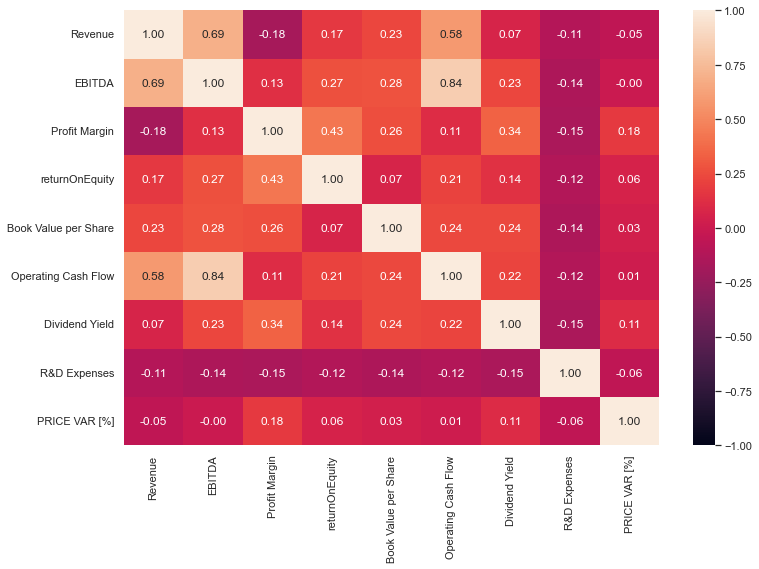

In [260]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

#### From the Correlation Matrix, PRICE VAR [%] does not have strong correlation with any specific indicators. Since Class can be derived from PRICE VAR [%], we can choose either PRICE VAR [%] or Class to build the model
- if PRICE VAR [%] is negative then Class = 0
- if PRICE VAR [%] is positive then Class = 1
#### Our machine learning models will focus on predicting Buy/Sell Class rather than amount of profit/loss. So we will drop PRICE VAR [%] and only use the indicators to predict Class

<AxesSubplot:>

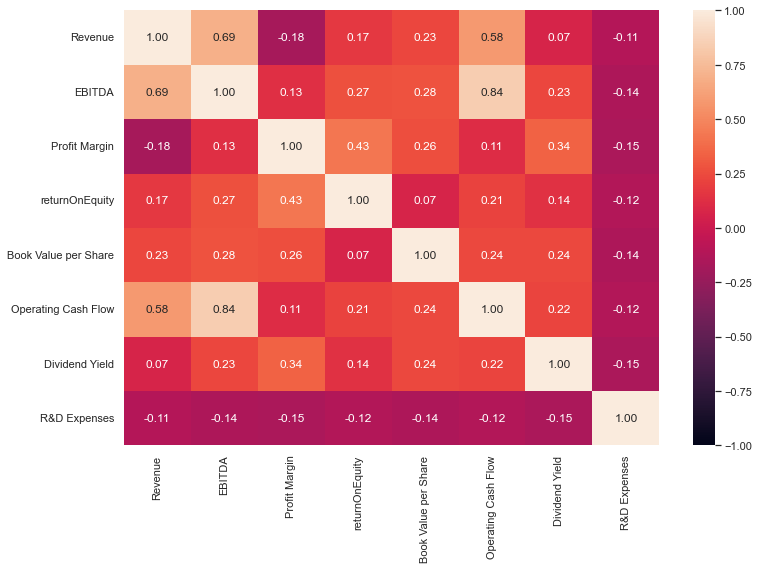

In [261]:
df.drop(columns="PRICE VAR [%]", inplace=True)
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

#### We can also remove indicators that may be redundant (Have a high correlation to another indicator)
- EBITDA is likely to be redundant because it had correlation coefficients = 0.69, 0.84 with EBITDA, Operating Cash Flow respectively

<AxesSubplot:>

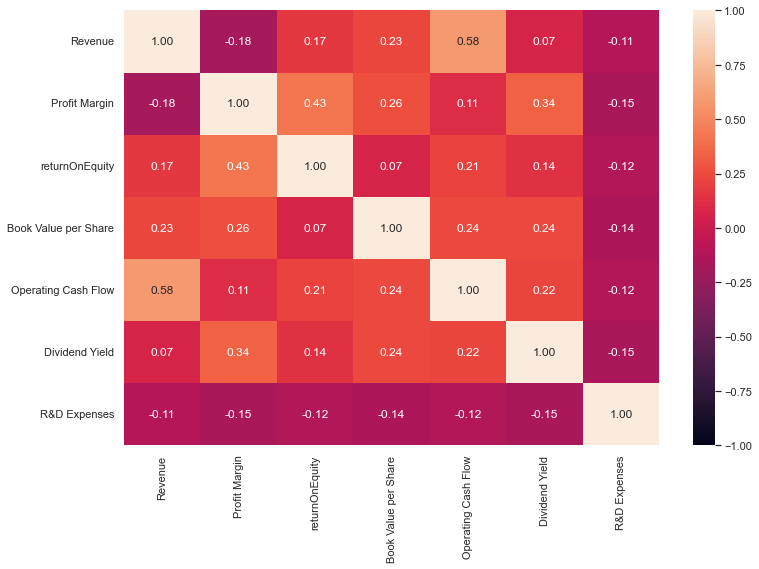

In [262]:
df.drop(columns="EBITDA", inplace=True)
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')


## 2.2 Analysis on Sector

In [263]:
df.drop(columns='Class').groupby('Sector').median()

,Revenue,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses
Sector,,,,,,,
Basic Materials,4.716450e+08,0.0510,0.07435,9.9985,5.941700e+07,0.00000,0.000000e+00
Communication Services,4.349010e+08,0.0200,0.05890,5.4420,1.720000e+08,0.00000,0.000000e+00
Consumer Cyclical,7.765071e+08,0.0434,0.08575,10.0160,5.280600e+07,0.00000,0.000000e+00
Consumer Defensive,5.973810e+08,0.0370,0.09160,10.1470,4.409300e+07,0.00000,0.000000e+00
Energy,4.335750e+08,0.0955,0.07795,10.5450,8.875250e+07,0.00000,0.000000e+00
Financial Services,1.188045e+08,0.1680,0.07795,14.0065,2.581200e+07,0.01240,0.000000e+00
Healthcare,9.186815e+07,0.0280,0.02955,5.5195,5.228000e+06,0.00000,1.643639e+06
Industrials,7.189800e+08,0.0400,0.09580,10.4190,5.523774e+07,0.00000,0.000000e+00
Real Estate,3.742340e+08,0.0830,0.04840,13.6045,1.205260e+08,0.02505,0.000000e+00


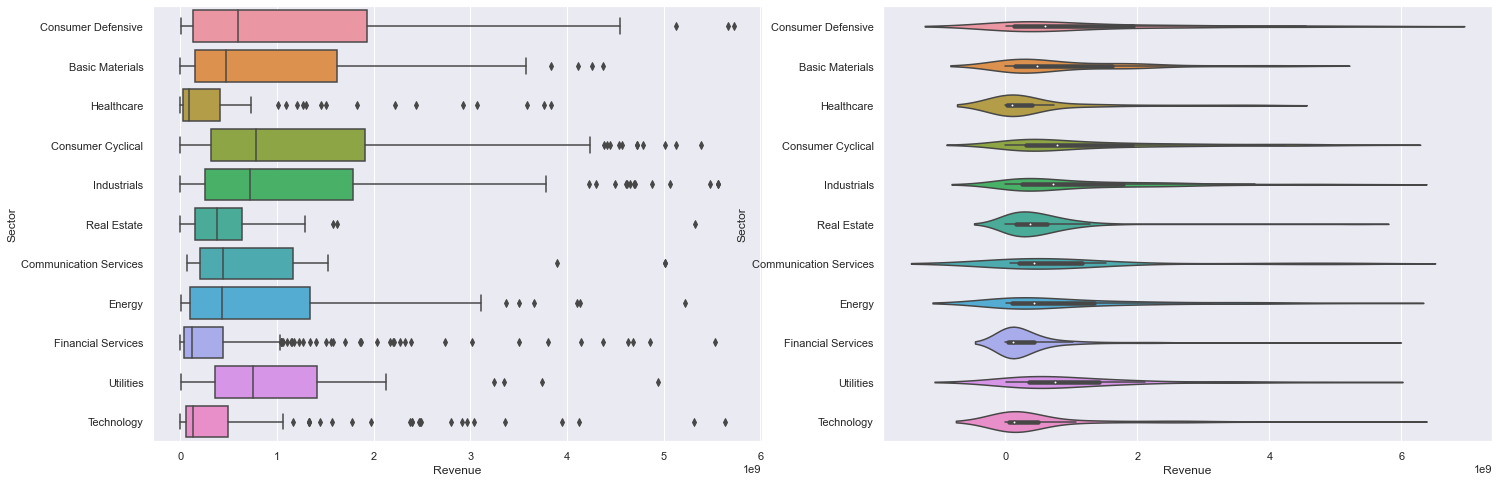

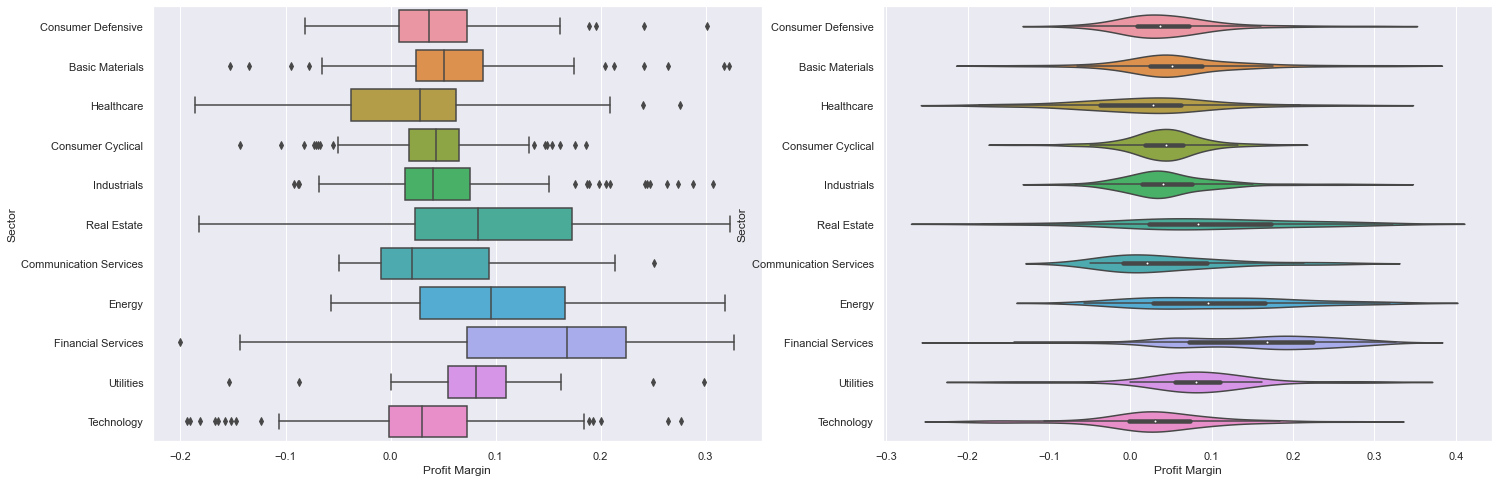

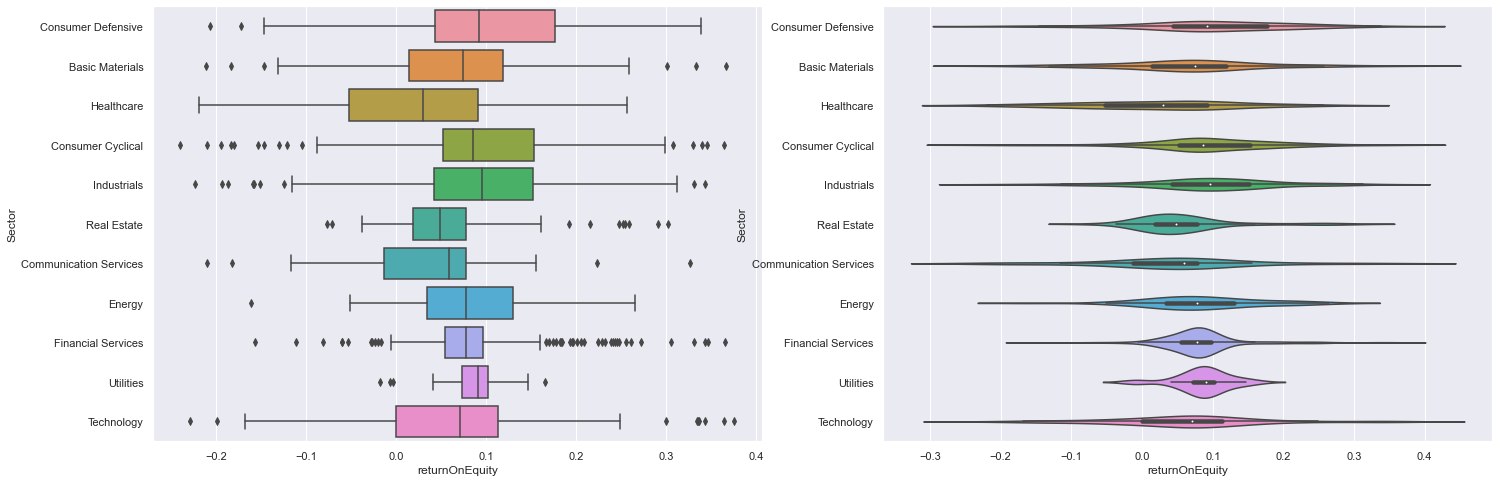

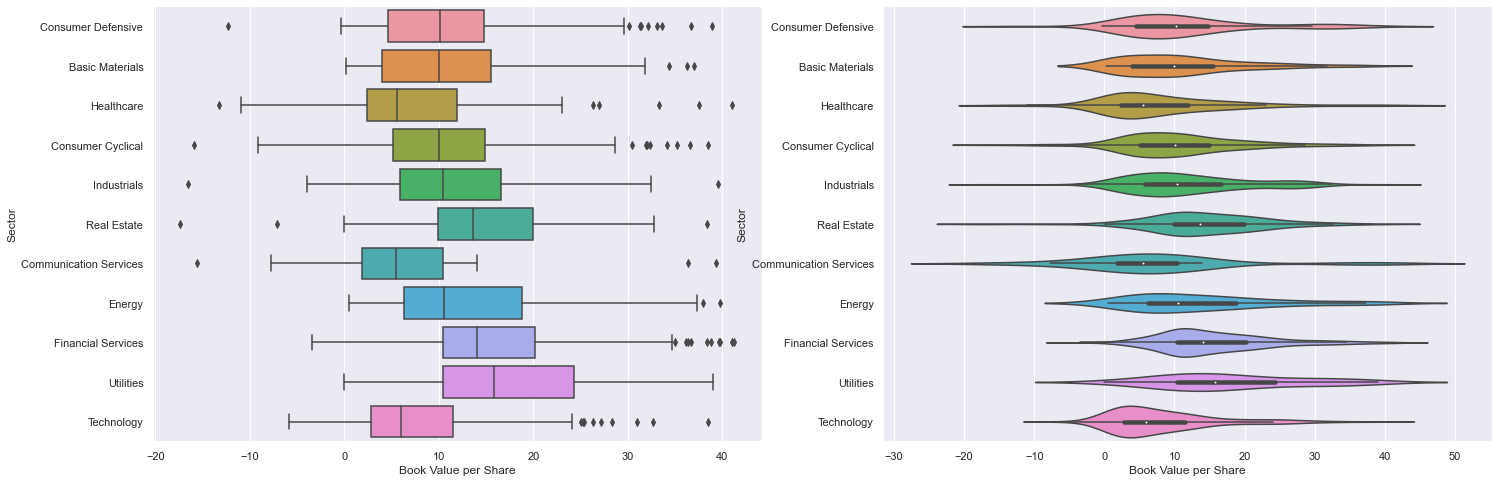

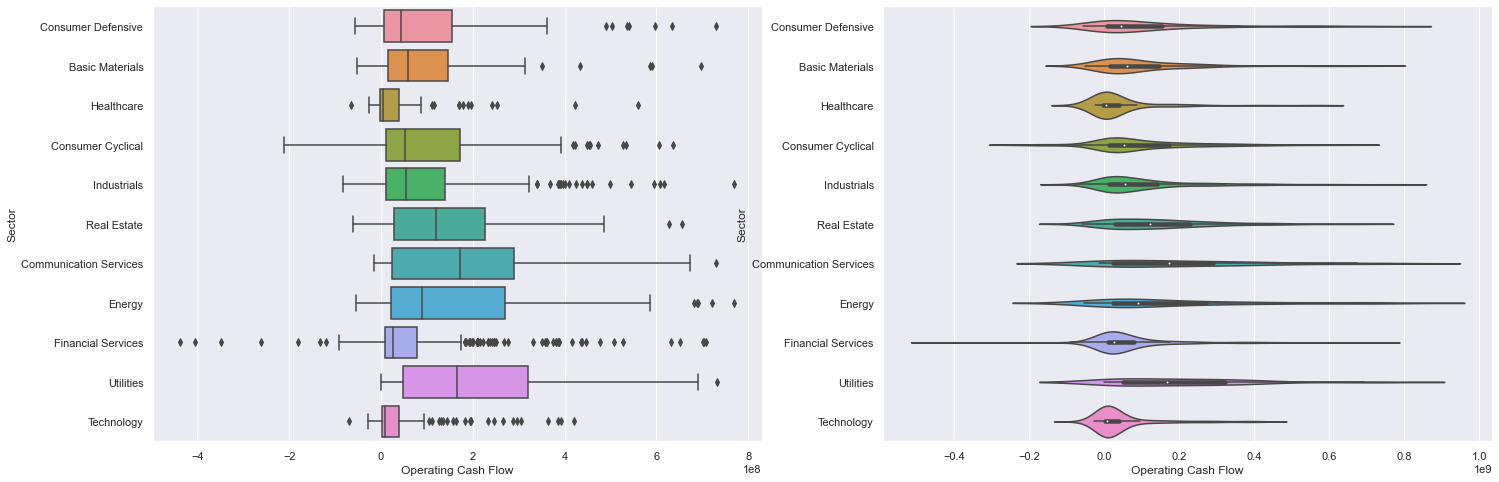

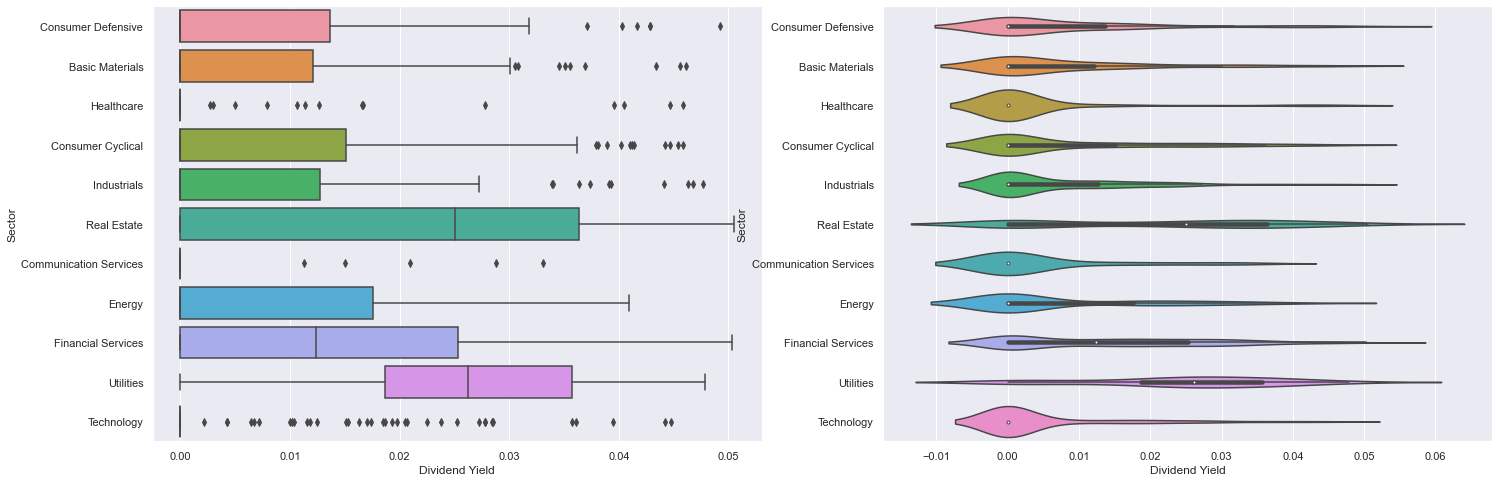

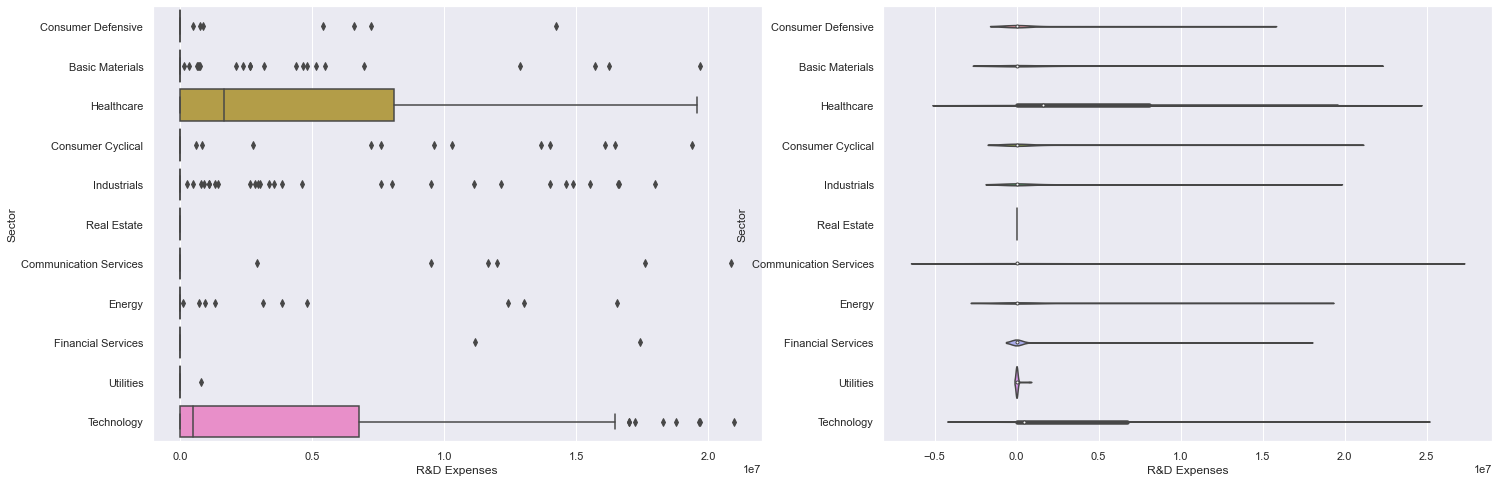

In [264]:
for factor in df.columns[0:-2]:
    f, axes = plt.subplots(1, 2, figsize=(24,8))
    sns.boxplot(x = factor, y = 'Sector', data = df, ax = axes[0])
    sns.violinplot(x = factor, y = 'Sector', data = df, ax = axes[1])

#### Insights from the the Analysis
- Revenue, Profit Margin, returnOnEquity, Book Value Per Share, Operating Cash Flow does not differ much between different sectors.
- Most stocks in Healthcare, Communication Services, Technology sectors do not pay dividends. This might be because they prioritized on growth.
- Most stocks do not invest in R&D, except for stocks in Healthcare and Technology sectors.
- We can see that Dividend Yield and R&D Expenses is not consistent between different sectors. Since we wanted to build a model which could work consistently regardless of the stock sector, we will not use these two indicators to build our model.

In [265]:
# remove Dividend Yield, R&D expenses, and Sector
df.drop(columns=['Dividend Yield', 'R&D Expenses', 'Sector'], inplace=True)
df

,Revenue,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Class
0,5.727000e+09,0.066,0.2041,6.706,634100000.0,1
1,4.551600e+09,-0.021,-0.1154,2.211,536500000.0,1
2,2.464867e+09,0.196,0.3189,3.020,597491000.0,1
3,3.297600e+09,0.126,0.1969,7.779,540300000.0,1
4,5.973810e+08,0.122,0.1289,10.909,111582000.0,1
...,...,...,...,...,...,...
1516,1.185080e+08,0.034,0.1324,4.249,7612000.0,0
1517,4.952987e+07,-0.002,-0.0097,4.505,523987.0,1
1518,1.532400e+08,0.085,0.3646,2.426,-1587000.0,0
1519,3.407580e+08,0.017,0.1456,8.489,5745000.0,1


## 2.3 Analysis on remaining indicators vs Class

In [266]:
df.drop(columns='Class').describe()

,Revenue,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow
count,1.521000e+03,1521.000000,1521.000000,1521.000000,1.521000e+03
mean,8.386379e+08,0.076854,0.078412,12.414021,9.588411e+07
std,1.143006e+09,0.092090,0.092069,8.974785,1.442930e+08
min,0.000000e+00,-0.200000,-0.239300,-17.348000,-4.367730e+08
25%,8.292600e+07,0.020000,0.035000,5.819000,6.933694e+06
50%,3.797890e+08,0.053000,0.077950,10.419000,4.192500e+07
75%,1.109197e+09,0.130000,0.120100,17.424900,1.367880e+08
max,5.727000e+09,0.327000,0.375100,41.215000,7.690180e+08


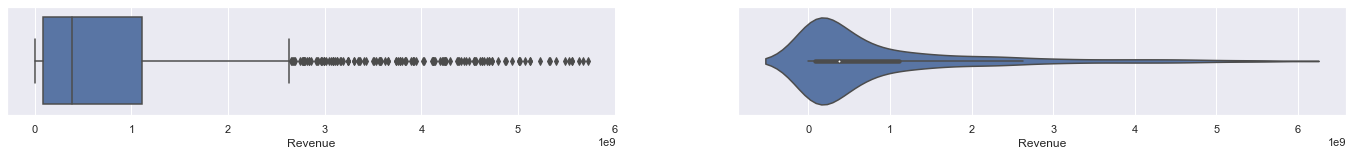

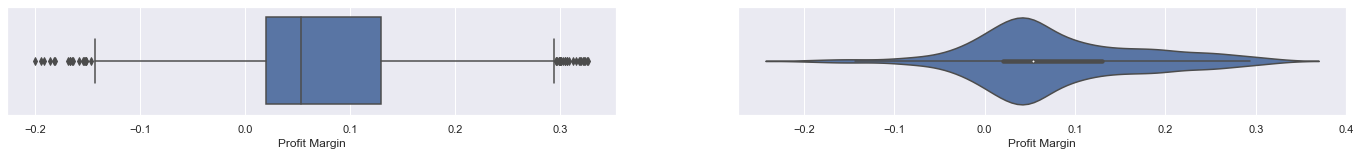

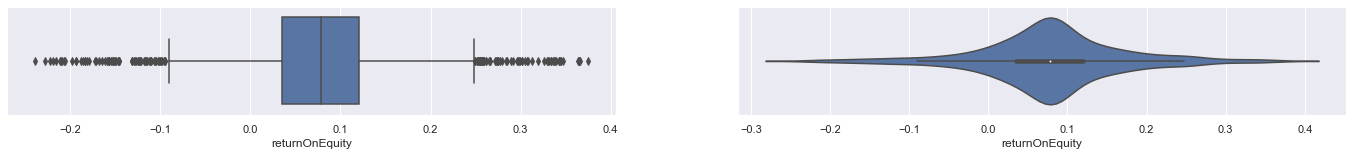

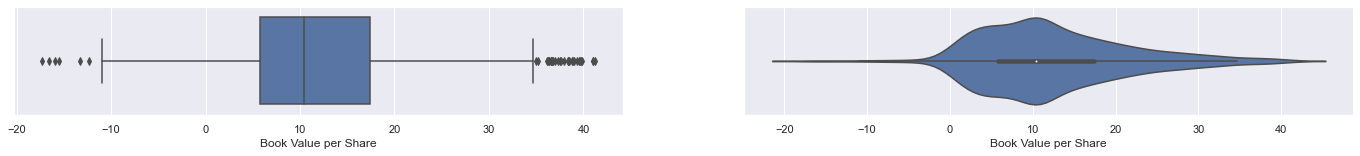

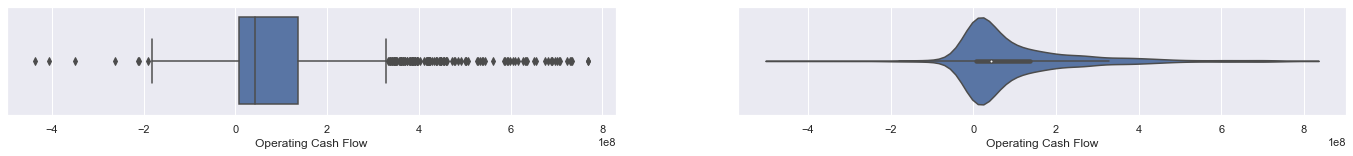

In [267]:
for factor in df.drop(columns='Class'):
    f, axes = plt.subplots(1, 2, figsize=(24,2))
    sns.boxplot(x = factor, data = df, ax = axes[0])
    sns.violinplot(x = factor, data = df, ax = axes[1])

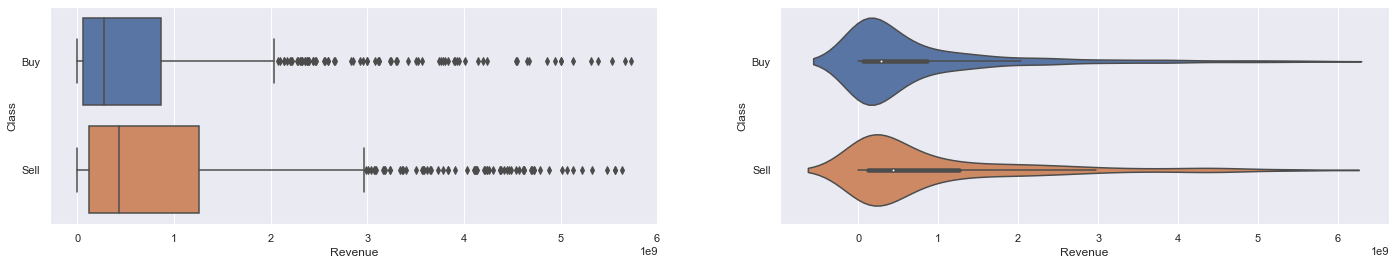

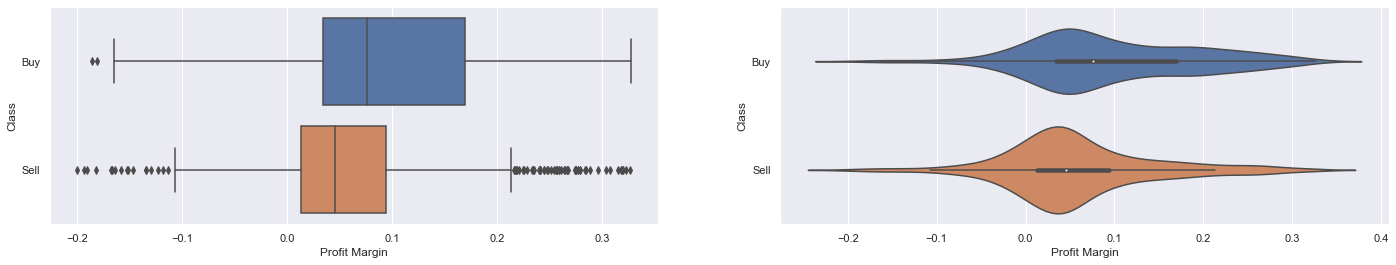

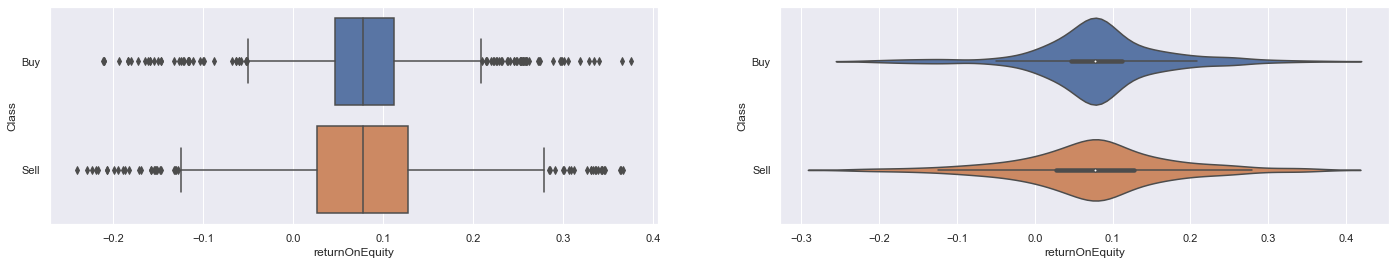

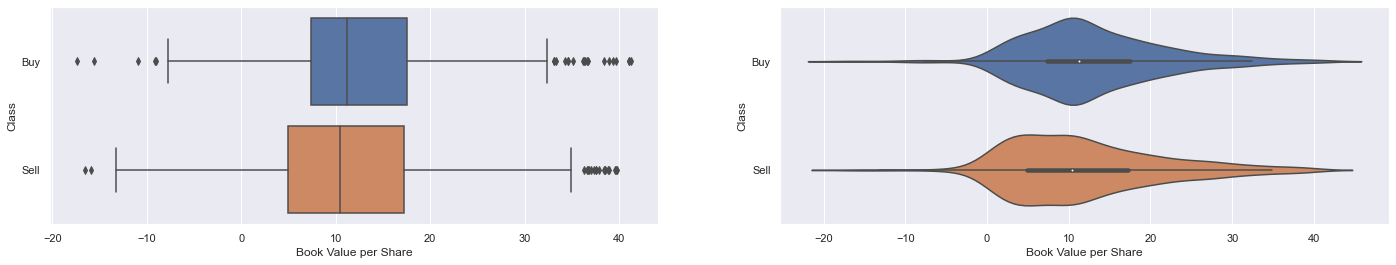

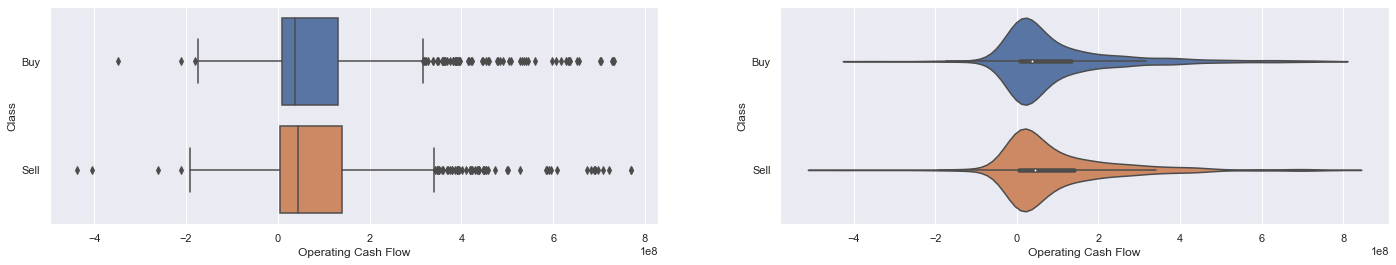

In [268]:
df_copy = df.copy()
df_copy.loc[df_copy['Class'] == 1, 'Class'] = 'Buy'
df_copy.loc[df_copy['Class'] == 0, 'Class'] = 'Sell'
for factor in df_copy.drop(columns='Class').columns:
    f, axes = plt.subplots(1, 2, figsize=(24,4))
    sns.boxplot(x = factor, y = 'Class', data = df_copy, ax = axes[0])
    sns.violinplot(x = factor, y = 'Class', data = df_copy, ax = axes[1])

#### From the diagrams above, it is clear that no one specific factor can accurately predict the Buy/Sell rating of the stock. Therefore, we will use multiple indicators to build the model.

## 2.4 Save Filtered Dataframe

In [269]:
df.to_csv('2014_After_EDA.csv', index=False)